## Specht Ideals Python Code

The Python code is split into to multiple files: `partitions.py` contains the partition behavior, `expressions.py` contains the class that represents a Hilbert series, `specht_ideals.py` contains the files for computing Hilbert series of Specht ideals, and `main.py` contains example runs of the functions.

Below are some demonstrations of the functionality of the classes in `partitions.py`.

### `Partition` class

The `Partition` class represents an integer partition. Upon construction, the parts are automatically sorted in decreasing order.

The class has functions for basic partition information like length and sum. It can compute corner sets, generate partitions obtained by adding or removing a box from a specified part, and determine all partitions that are covered in the dominance order.

The dominance order is implemented using standard comparison operators (`<=`, `>=`, `<`, `>`), allowing partitions to be compared directly. The class also supports computing the meet of two partitions in the dominance lattice.

In [1]:
from partitions import *

# Create a partition
p = Partition([3, 2, 2, 1])
print(p)
print(p.sum(), p.len())

# Corner set of the Young diagram - { (i, j) such that j = p_i and p_{i + 1} < p_i }
print(p.corner_set())

# Add or remove 1 from a part
print(p.add_to_part(2))
print(p.remove_from_part(1))

# Dominance order comparisons
print(Partition([4, 1, 1]) <= Partition([3, 2, 1]))
print(Partition([3, 2, 1]) < Partition([3, 1, 1, 1]))

# Meet in the dominance lattice
print(Partition([4, 2, 1]).meet(Partition([3, 3, 1])))

# Partitions covered by p
print(p.find_covered_partitions())

Partition([3, 2, 2, 1])
8 4
[[1, 3], [3, 2], [4, 1]]
Partition([3, 3, 2, 1])
Partition([2, 2, 2, 1])
False
False
Partition([3, 3, 1])
[Partition([2, 2, 2, 2]), Partition([3, 2, 1, 1, 1])]


### `Partitions` class

The `Partitions` class represents $P_n$ equipped with the domination order. When initialized, the class automatically generates every partition of $n$. The class has a method to show the Hasse diagram for the dominance order poset using the `networkx` and `matplotlib` libraries.

[Partition([6]), Partition([5, 1]), Partition([4, 2]), Partition([3, 3]), Partition([4, 1, 1]), Partition([3, 2, 1]), Partition([2, 2, 2]), Partition([3, 1, 1, 1]), Partition([2, 2, 1, 1]), Partition([2, 1, 1, 1, 1]), Partition([1, 1, 1, 1, 1, 1])]


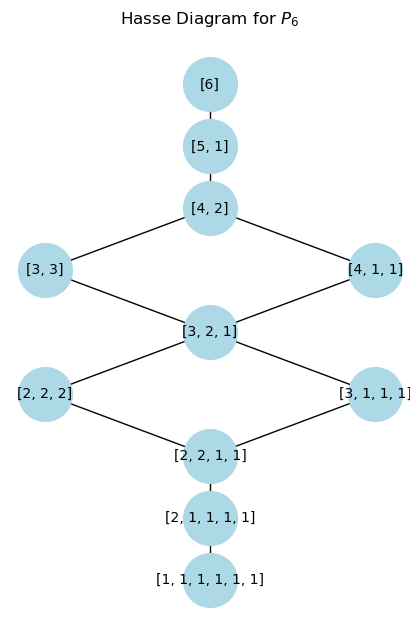

In [2]:
# Get all partitions of 6
P = Partitions(6)
print(P.partitions)
P.show_hasse_diagram(width=4, height=6)

### `LowerOrderIdeal` class

The `LowerOrderIdeal` class represents a lower order ideal in $P_n$. The code allows the ideal to be empty. It is constructed by specifying the generators for the ideal, and the code includes all partitions dominated by the generators. The code also automatically calculates the maximum elements of the ideal upon construction. If our ideal is $\mathcal{L}$, the code can construct the lower order ideal $\mathcal{L}_i$.

In [3]:
# Create a lower order ideal in P_5 generated by (3, 2)
I = LowerOrderIdeal(5, generators=[Partition([3, 2])])
print(I, I.partitions)

# Add a new partition (ideal expands automatically)
I.add_partition_to_ideal(Partition([4, 1]))
print(I, I.partitions)

# Construct a smaller ideal (L_i) in P_4
I4 = I.smaller_ideal(k=1)
print(I4, I4.partitions)

Lower order ideal of 5 partitions of 5
Generated by [Partition([3, 2])] [Partition([3, 2]), Partition([3, 1, 1]), Partition([2, 2, 1]), Partition([2, 1, 1, 1]), Partition([1, 1, 1, 1, 1])]
Lower order ideal of 6 partitions of 5
Generated by [Partition([4, 1])] [Partition([3, 2]), Partition([3, 1, 1]), Partition([2, 2, 1]), Partition([2, 1, 1, 1]), Partition([1, 1, 1, 1, 1]), Partition([4, 1])]
Lower order ideal of 4 partitions of 4
Generated by [Partition([3, 1])] [Partition([3, 1]), Partition([2, 2]), Partition([2, 1, 1]), Partition([1, 1, 1, 1])]
